<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/Mobility_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**



##Mobitity

Source: Global_Transnational_Mobility_dataset_v1.0

Using indicators
I1.1 Mouvements to country target_mobility

I1.2 Mouvements from country source_mobility

I1.3 Mouvements to country from LATAM target_mobility_latam

+ Aditional data from Global Transnational Mobility dataset of venezuela an bolivia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GT_Mobility_v1.0.csv'

mobility_df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
mobility_df

,source_name,target_name,source_iso3,target_iso3,year,estimated_trips,dist,source_region,target_region,source_subregion,target_subregion
0,Afghanistan,Rwanda,AFG,RWA,2014,29.0,5755.222,Asia,Africa,Southern Asia,Sub-Saharan Africa
1,Afghanistan,Netherlands,AFG,NLD,2014,6991.0,5361.400,Asia,Europe,Southern Asia,Western Europe
2,Afghanistan,Congo,AFG,COG,2011,0.0,7100.583,Asia,Africa,Southern Asia,Sub-Saharan Africa
3,Afghanistan,Hungary,AFG,HUN,2012,308.0,4367.694,Asia,Europe,Southern Asia,Eastern Europe
4,Afghanistan,Cabo Verde,AFG,CPV,2012,0.0,9324.580,Asia,Africa,Southern Asia,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...
229315,Zimbabwe,Romania,ZWE,ROU,2015,79.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229316,Zimbabwe,Cabo Verde,ZWE,CPV,2012,19.0,7006.872,Africa,Africa,Sub-Saharan Africa,Sub-Saharan Africa
229317,Zimbabwe,Romania,ZWE,ROU,2013,80.0,NaN,Africa,Europe,Sub-Saharan Africa,Eastern Europe
229318,Zimbabwe,Malta,ZWE,MLT,2014,19.0,6228.657,Africa,Europe,Sub-Saharan Africa,Southern Europe


In [4]:
# Filter for countries CHL and ARG
countries_target = ['CHL', 'ARG']

#target_iso3 country of destiny
country_df = mobility_df[mobility_df['target_iso3'].isin(countries_target)]

In [5]:
#contruyo un indicador por pais de destino y otro de origen sumando los estimated_by_hundred
country_df_grp = country_df.groupby(['year','target_iso3',])['estimated_trips'].sum().reset_index()


# Pivotar los datos para obtener las columnas con los países como series
pivot_data = country_df_grp.pivot_table(index='year', columns='target_iso3', values='estimated_trips', aggfunc='sum').fillna(0)
pivot_data = pivot_data / 100000.0
pivot_data

target_iso3,ARG,CHL
year,,
2011,121.33921,59.16559
2012,126.78938,65.28705
2013,125.00972,66.44472
2014,130.44692,71.72922
2015,150.21604,84.05899
2016,169.89971,97.91534


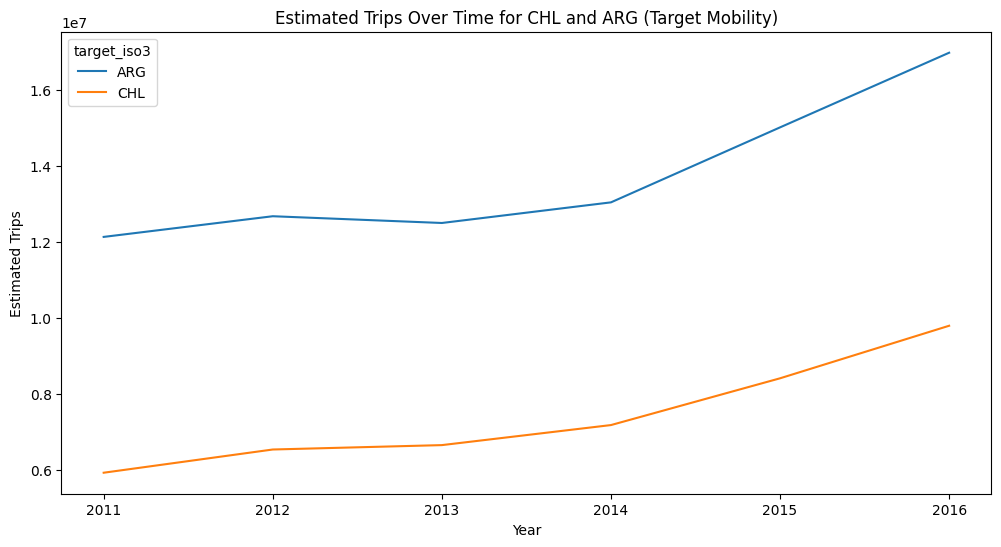

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='estimated_trips', hue='target_iso3', data=country_df_grp)
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

En términos absolutos Argentina tiene un mayor volumen de viajes.
En ambos casos los datos parecen aumentar notablemente a partir de 2014.
¿que pasa en otros paises?

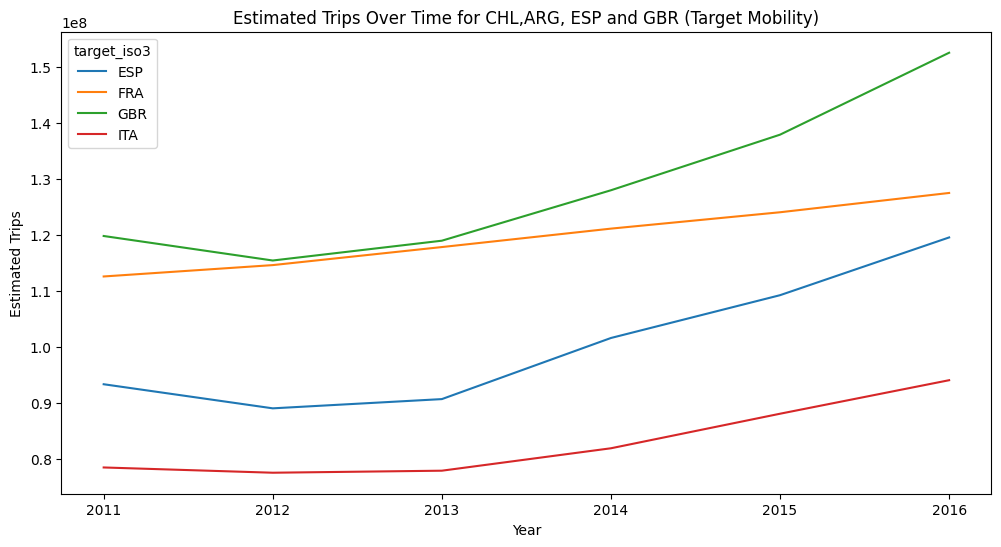

In [7]:
##Check for other countries the dinamic

countries_b = ['ESP','GBR','FRA','ITA']

country_b = mobility_df[mobility_df['target_iso3'].isin(countries_b)]

country_b_grp = country_b.groupby(['year','target_iso3',])['estimated_trips'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='estimated_trips', hue='target_iso3', data=country_b_grp)
plt.title('Estimated Trips Over Time for CHL,ARG, ESP and GBR (Target Mobility)')
plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.show()

Las dinámicas de estos paises también parece mostrar un incremente desde 2014.. ¿es un sesgo de la base o es una caracterítica de las movilidades mundiales reales?

### Trips to CHL and ARG by regions

In [8]:

country_df_grp = country_df.groupby(['year','target_iso3','source_region',])['estimated_trips'].sum().reset_index()


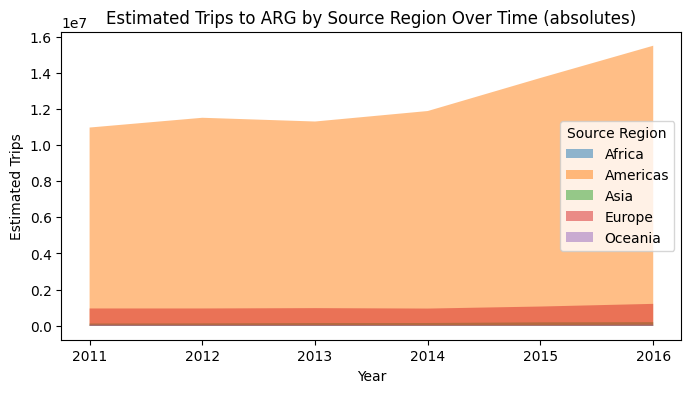

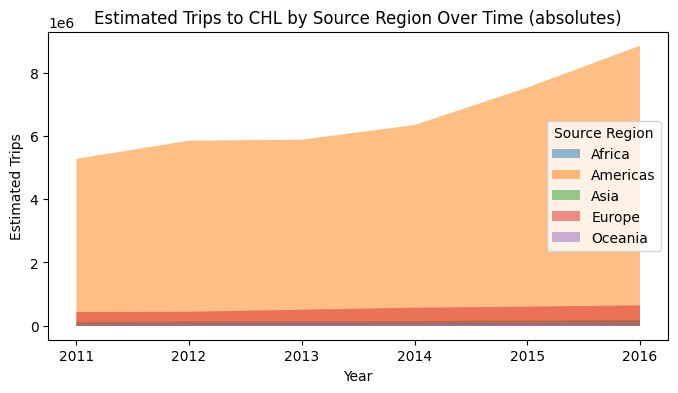

In [9]:
#plot for each country estimated trips by source_region and year
for target in country_df_grp['target_iso3'].unique():
    target_data = country_df_grp[country_df_grp['target_iso3'] == target]
    plt.figure(figsize=(8, 4))

    for region in target_data['source_region'].unique():
        region_data = target_data[target_data['source_region'] == region]
        plt.fill_between(region_data['year'], region_data['estimated_trips'], label=region, alpha=0.5)

    plt.title(f'Estimated Trips to {target} by Source Region Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Region')
    plt.show()

**Distribution by region (%)**

In [10]:
##distribution by region (%)
# Calculate total trips per year
total_trips_by_year = country_df_grp.groupby(['year', 'target_iso3'])['estimated_trips'].sum().reset_index()

# Merge total trips back into the original grouped data
country_df_grp = pd.merge(country_df_grp, total_trips_by_year, on=['year', 'target_iso3'], suffixes=('', '_total'))

# Calculate percentage
country_df_grp['percentage'] = (country_df_grp['estimated_trips'] / country_df_grp['estimated_trips_total']) * 100

country_df_grp

,year,target_iso3,source_region,estimated_trips,estimated_trips_total,percentage
0,2011,ARG,Africa,34801.0,12133921.0,0.286808
1,2011,ARG,Americas,10969123.0,12133921.0,90.400481
2,2011,ARG,Asia,122641.0,12133921.0,1.010729
3,2011,ARG,Europe,954411.0,12133921.0,7.865644
4,2011,ARG,Oceania,52945.0,12133921.0,0.436339
5,2011,CHL,Africa,33918.0,5916559.0,0.573272
6,2011,CHL,Americas,5272008.0,5916559.0,89.105982
7,2011,CHL,Asia,119612.0,5916559.0,2.021648
8,2011,CHL,Europe,430177.0,5916559.0,7.270729
9,2011,CHL,Oceania,60844.0,5916559.0,1.028368


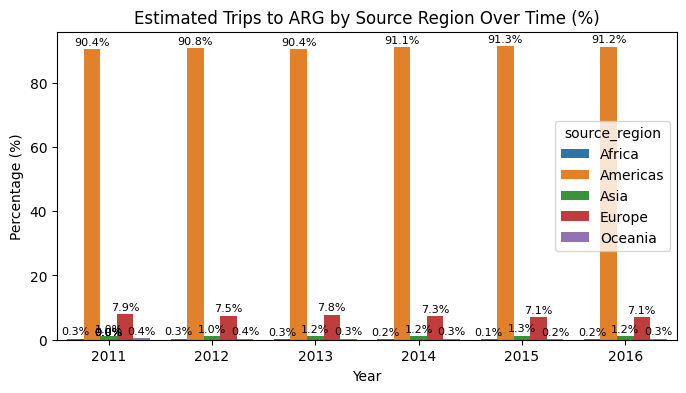

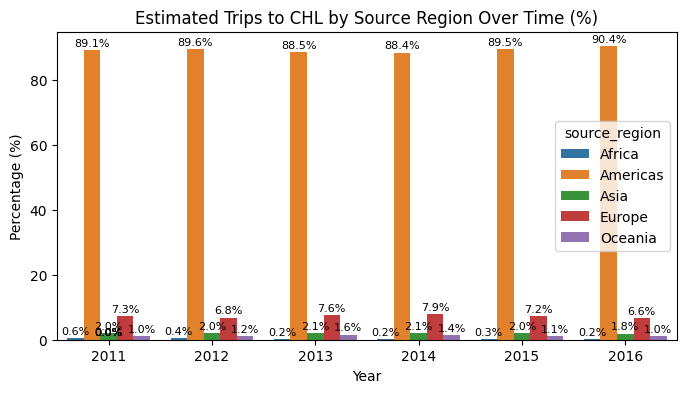

In [11]:
for target in country_df_grp['target_iso3'].unique():
    target_data = country_df_grp[country_df_grp['target_iso3'] == target]
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='year', y='percentage', hue='source_region', data=target_data)
    plt.title(f'Estimated Trips to {target} by Source Region Over Time (%)')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')

    # Annotate bars with percentage values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

### Main countries of the Americas traveling to ARG and CHL

In [12]:
americas_df_ar = country_df[(country_df['source_region'] == 'Americas') & (country_df['target_iso3'] == 'ARG')]
americas_df_ar_grp = americas_df_ar.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
top5_americas_ar = americas_df_ar_grp.sort_values(['year', 'estimated_trips'], ascending=[True, False]).groupby(['year']).head(6)
top5_americas_ar.head()

,year,source_iso3,estimated_trips
5,2011,BRA,2876149.0
32,2011,URY,2378640.0
8,2011,CHL,2220104.0
27,2011,PRY,850521.0
33,2011,USA,833335.0


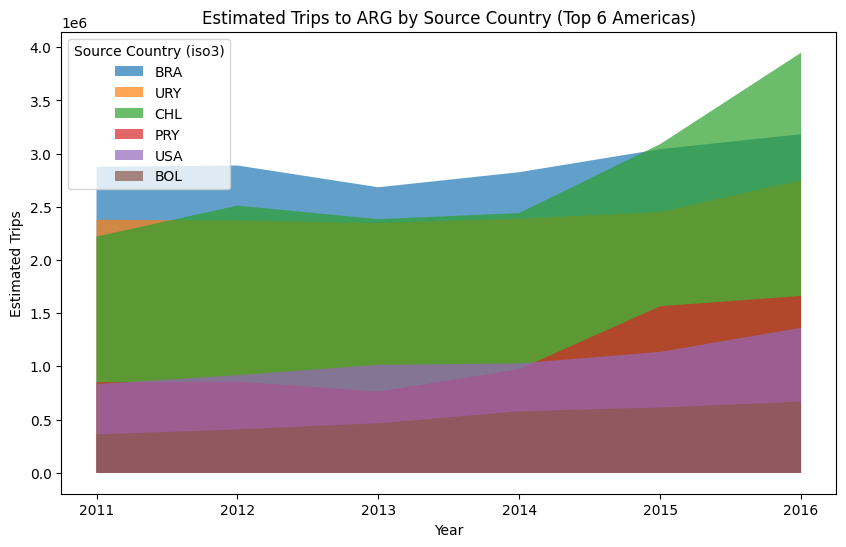

In [13]:

    plt.figure(figsize=(10, 6))
    for source in top5_americas_ar['source_iso3'].unique():
        source_data = top5_americas_ar[top5_americas_ar['source_iso3'] == source]
        plt.fill_between(source_data['year'], source_data['estimated_trips'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to ARG by Source Country (Top 6 Americas)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

In [14]:
americas_df_ch = country_df[(country_df['source_region'] == 'Americas') & (country_df['target_iso3'] == 'CHL')]
americas_df_ch_grp = americas_df_ch.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
top5_americas_ch = americas_df_ch_grp.sort_values(['year', 'estimated_trips'], ascending=[True, False]).groupby(['year']).head(6)
top5_americas_ch

,year,source_iso3,estimated_trips
0,2011,ARG,2220104.0
26,2011,PER,1080633.0
6,2011,BRA,541794.0
5,2011,BOL,377832.0
33,2011,USA,323905.0
9,2011,COL,121566.0
37,2012,ARG,2511491.0
63,2012,PER,1144955.0
43,2012,BRA,624426.0
42,2012,BOL,434305.0


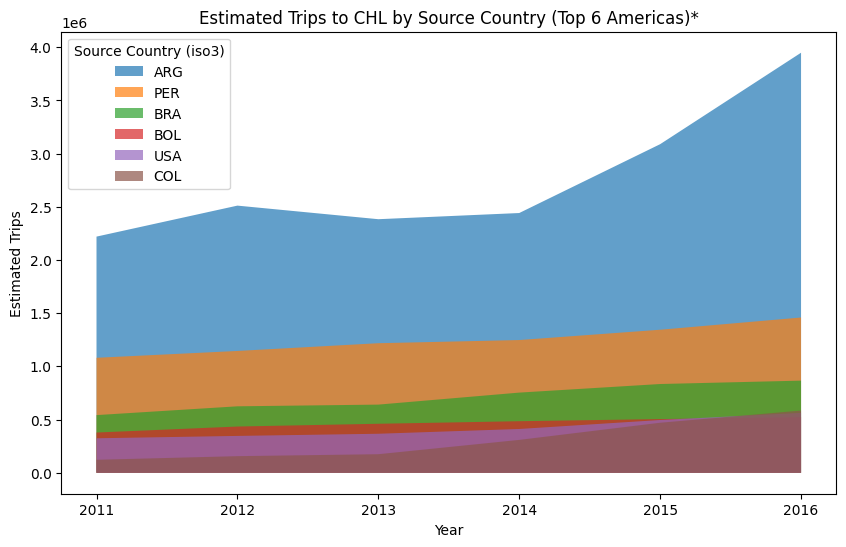

In [15]:
    plt.figure(figsize=(10, 6))
    for source in top5_americas_ch['source_iso3'].unique():
        source_data = top5_americas_ch[top5_americas_ch['source_iso3'] == source]
        plt.fill_between(source_data['year'], source_data['estimated_trips'], label=source, alpha=0.7)

    plt.title(f'Estimated Trips to CHL by Source Country (Top 6 Americas)*')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source Country (iso3)', loc='upper left')
    plt.show()

Esto se puede verificar en mayor profundidad, en 2016 aparece Colombia en lugar de Bolivia y por eso se corta el gráfico original de top 5, si aumento a 6 aparece Colombia como aumenta.

En Argentina también al tomar 6 primeros paises que realizan viajes hacia Argentina aparece Bolivia en 6to lugar


### Analizing in particular Bolivia and Venezuela in the mobilities to Chile and Argentina.

In [16]:
#country_df is already filtered by CHL and ARG as target countries

df_ven_bol = country_df[country_df['source_iso3'].isin(['BOL', 'VEN','CHL','ARG'])]
df_ven_bol = df_ven_bol.groupby(['target_iso3','year','source_iso3',])['estimated_trips'].sum().reset_index()
df_ven_bol = df_ven_bol.sort_values(['year', 'estimated_trips'], ascending=[True, False])
df_ven_bol.head()

,target_iso3,year,source_iso3,estimated_trips
1,ARG,2011,CHL,2220104.0
18,CHL,2011,ARG,2220104.0
19,CHL,2011,BOL,377832.0
0,ARG,2011,BOL,359026.0
2,ARG,2011,VEN,132276.0


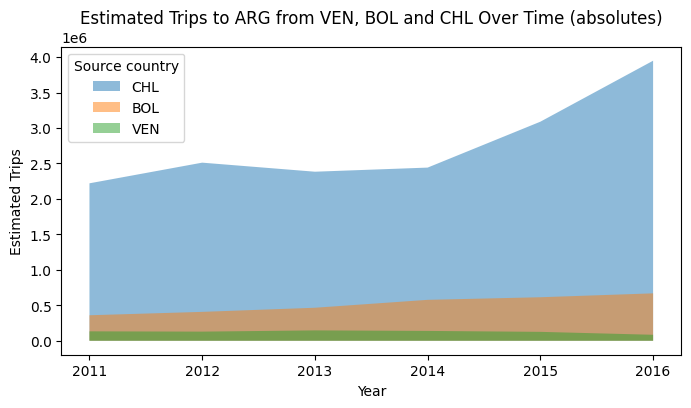

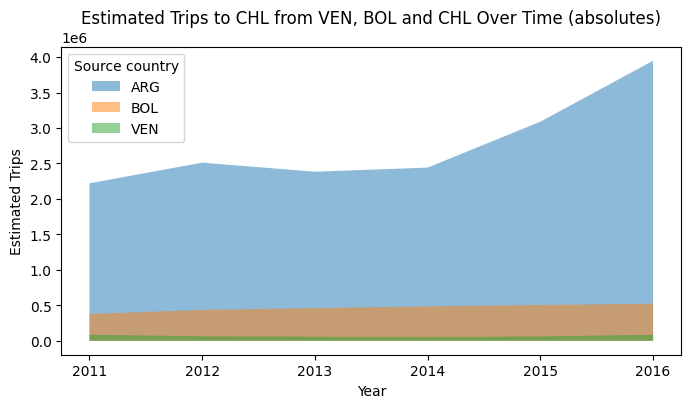

In [17]:
#plot for each country estimated trips by source_region and year
for target in df_ven_bol['target_iso3'].unique():
    target_data = df_ven_bol[df_ven_bol['target_iso3'] == target]
    plt.figure(figsize=(8, 4))

    for country in target_data['source_iso3'].unique():
        country_data = target_data[target_data['source_iso3'] == country]
        plt.fill_between(country_data['year'], country_data['estimated_trips'], label=country, alpha=0.5)

    plt.title(f'Estimated Trips to {target} from VEN, BOL and CHL Over Time (absolutes)')
    plt.xlabel('Year')
    plt.ylabel('Estimated Trips')
    plt.legend(title='Source country')
    plt.show()

In [18]:
df_ven_bol['estimated_by_hundred_m'] = df_ven_bol['estimated_trips'] / 100000


**Compare travels from Bolivia to ARG and CHL**.

In [19]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['source_iso3'] == 'BOL')]

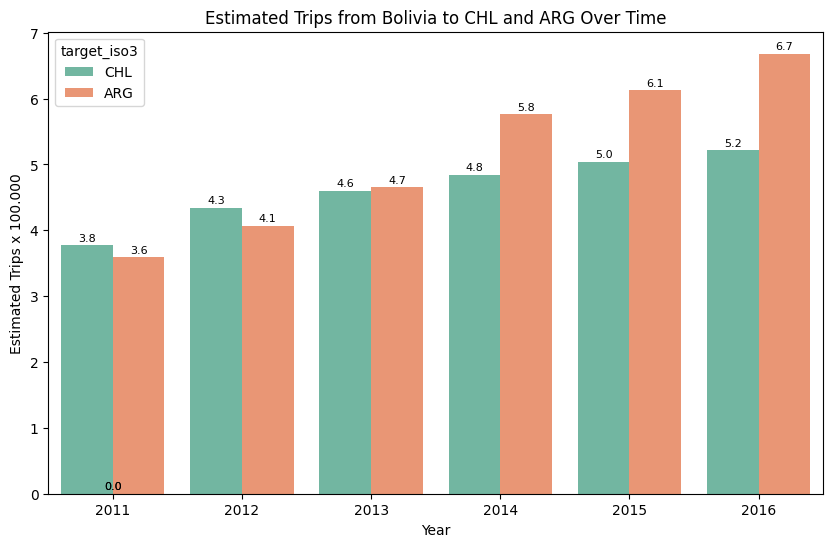

In [20]:
# Create the bar plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='estimated_by_hundred_m', hue='target_iso3', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Bolivia to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

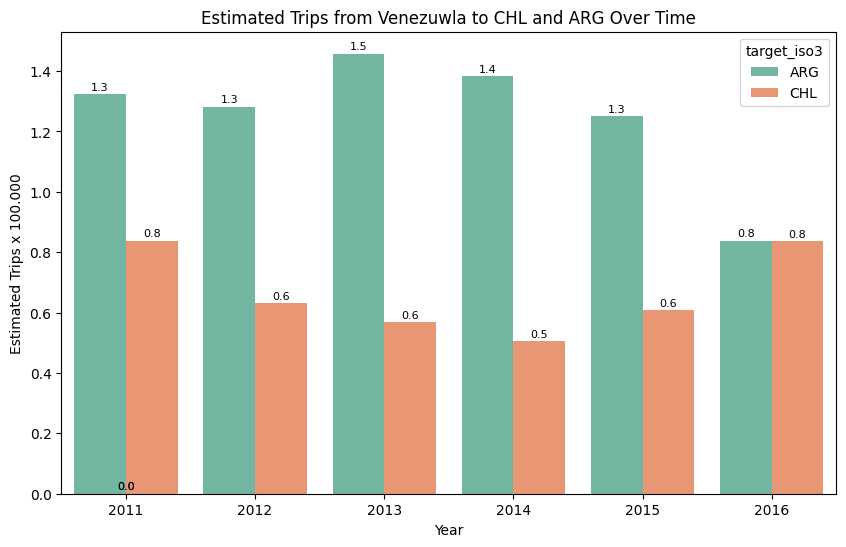

In [21]:
# Filtrar los datos para obtener solo los viajes desde BOL hacia CHL y ARG
filtered_data_bol = df_ven_bol[(df_ven_bol['source_iso3'] == 'VEN')]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='year', y='estimated_by_hundred_m', hue='target_iso3', data=filtered_data_bol, palette = "Set2")
plt.title('Estimated Trips from Venezuwla to CHL and ARG Over Time')
plt.xlabel('Year')
plt.ylabel('Estimated Trips x 100.000')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## Ratio of mobility per population

For this analysis I take the indicator base constructed. The base includes the aggregated indicators for ARG and CHL.

In [22]:
#G:\My Drive\3. Proyectos\MIGMOBS_nat\3_data_repository
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_indicators_7_1_2025.csv'

df_indicators = pd.read_csv(file_path)
print(df_indicators.head())

  country_code  year       value        indicator    fuente
0          ARG  2011  12133921.0  target_mobility  Mobitity
1          CHL  2011   5916559.0  target_mobility  Mobitity
2          ARG  2012  12678938.0  target_mobility  Mobitity
3          CHL  2012   6528705.0  target_mobility  Mobitity
4          ARG  2013  12500972.0  target_mobility  Mobitity



mobility ratio = amount of trips from COUNTRY / total population x year

That is, the proportion of people who move over the total population.

This should be reviewed because in reality these trips from the country are as much of people from the country who move as of people who come.



In [26]:
# Filter for countries CHL and ARG
countries_source = ['CHL', 'ARG']

#target_iso3 country of destiny
country_source_df = mobility_df[mobility_df['source_iso3'].isin(countries_target)]

country_source_df_grp=country_source_df.groupby(['year','source_iso3',])['estimated_trips'].sum().reset_index()
country_source_df_grp

,year,source_iso3,estimated_trips
0,2011,ARG,12054578.0
1,2011,CHL,5927374.0
2,2012,ARG,12594641.0
3,2012,CHL,6550168.0
4,2013,ARG,12406685.0
5,2013,CHL,6669163.0
6,2014,ARG,12958212.0
7,2014,CHL,7231466.0
8,2015,ARG,14877831.0
9,2015,CHL,8503460.0


In [27]:
#get population indicator
population_data = df_indicators[df_indicators['indicator'] == 'total_population_wb'][['country_code', 'year', 'value']].rename(columns={'value': 'total_population_wb'})
population_data

,country_code,year,total_population_wb
280,CHL,1960,8153350.0
281,ARG,1960,20386045.0
282,CHL,1961,8324802.0
283,ARG,1961,20726276.0
284,CHL,1962,8497059.0
...,...,...,...
399,ARG,2019,44973465.0
400,CHL,2020,19370624.0
401,ARG,2020,45191965.0
402,CHL,2021,19456334.0


In [28]:

# Combinar los datos por país y año
merged_data = pd.merge(mobility_data, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['mobility_ratio'] = merged_data['target_mobility'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

  country_code  year  target_mobility  total_population_wb  mobility_ratio
0          ARG  2011       12133921.0           41730660.0        0.290768
1          CHL  2011        5916559.0           17351816.0        0.340976
2          ARG  2012       12678938.0           42161721.0        0.300722
3          CHL  2012        6528705.0           17519119.0        0.372662
4          ARG  2013       12500972.0           42582455.0        0.293571


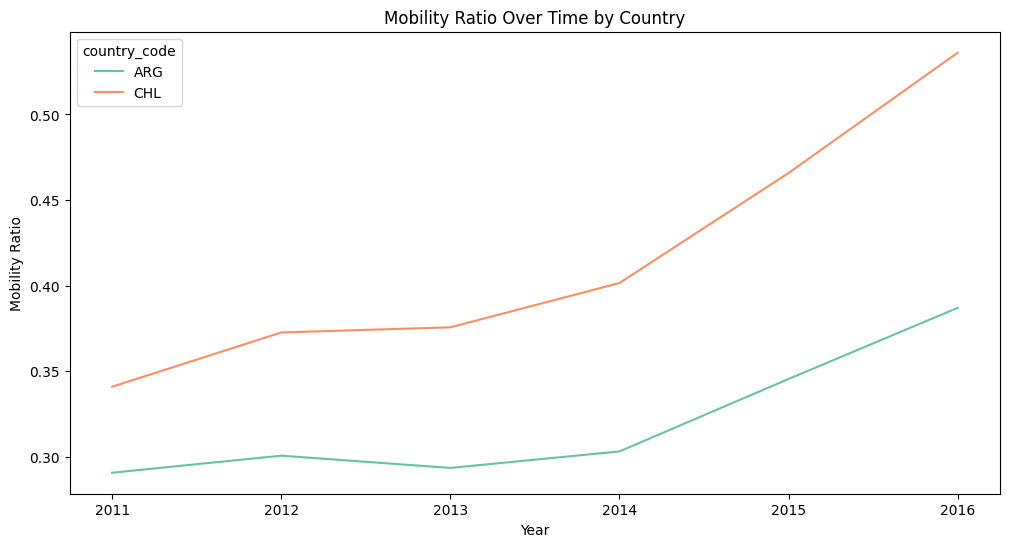

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mobility_ratio', hue='country_code', data=merged_data, palette = "Set2")
plt.title('Mobility Ratio Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Mobility Ratio')
plt.show()

The mobility ratio inverts the values between Argentina and Chile, showing that proportionally in relation to the population of that country there are more people moving from CHILE to other countries than from Argentina to other countries.

## Migration data

from:

https://riks.cris.unu.edu/annual-bilateral-migration-data


In [31]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [39]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[df2['iso_des'].isin(countries)]


In [41]:
latam_mig_df_grp = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
latam_mig_df_grp

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,CHL,109563
2,1961,ARG,2630230
3,1961,CHL,108385
4,1962,ARG,2636364
...,...,...,...
117,2018,CHL,1207629
118,2019,ARG,2214059
119,2019,CHL,1399076
120,2020,ARG,2245714


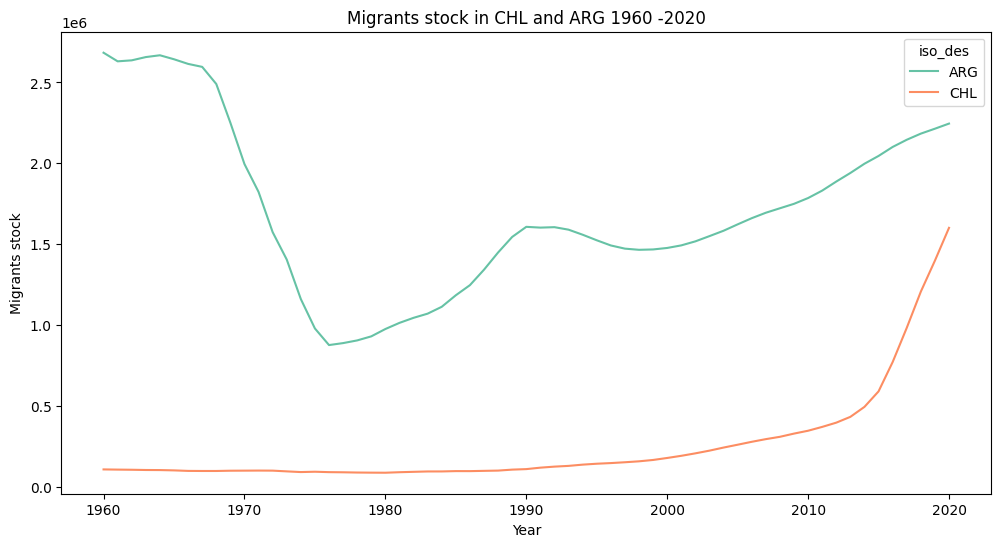

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='stock', hue='iso_des', data=latam_mig_df_grp, palette = "Set2")
plt.title('Migrants stock in CHL and ARG 1960 -2020')
plt.xlabel('Year')
plt.ylabel('Migrants stock')
plt.show()

### Stock of migrants born in VEN, CHL BOL and living Argentina

In [34]:
# prompt: filtrar latam_mig_df para iso_des ARG

# Filter latam_mig_df for iso_des ARG
arg_mig_df = latam_mig_df[latam_mig_df['iso_des'] == 'ARG']
arg_mig_df.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
332920,BOL,Bolivia,ARG,Argentina,1960,93271,NaN,NaN,9145.0
332921,BOL,Bolivia,ARG,Argentina,1961,93772,1315.0,14609.0,13294.0
332922,BOL,Bolivia,ARG,Argentina,1962,92958,9.0,15025.0,15016.0
332923,BOL,Bolivia,ARG,Argentina,1963,91235,-902.0,15555.0,16457.0
332924,BOL,Bolivia,ARG,Argentina,1964,93882,3457.0,15677.0,12220.0


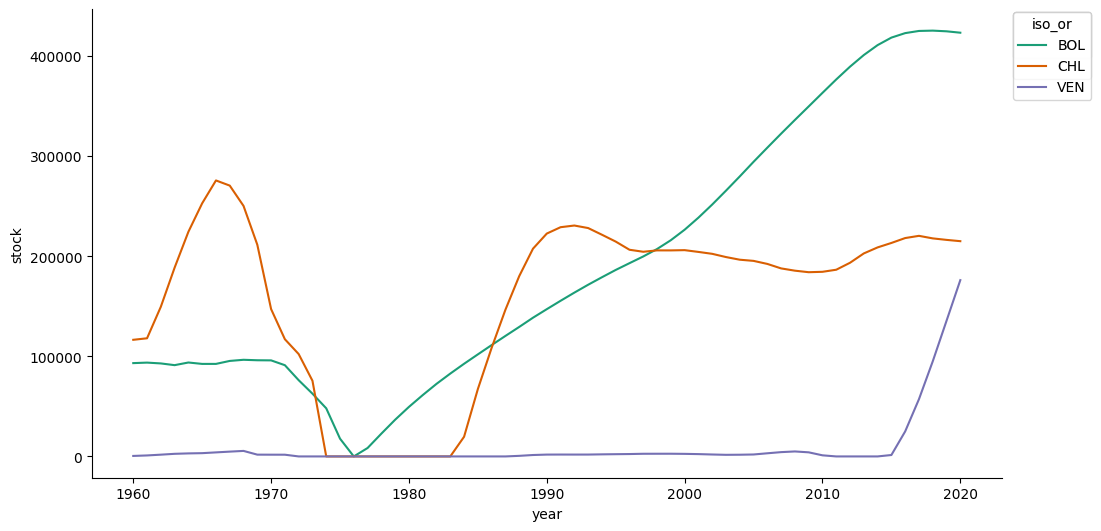

In [ ]:
# @title year vs stock (Migrants in Argentina)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['stock']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = arg_mig_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('iso_or')):
  _plot_series(series, series_name, i)
  fig.legend(title='iso_or', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('stock')

### Stock of migrants born in VEN, ARG BOL and living Chile

In [ ]:
# Filter latam_mig_df for iso_des CHL
chl_mig_df = latam_mig_df[latam_mig_df['iso_des'] == 'CHL']
chl_mig_df.head()

,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
112567,ARG,Argentina,CHL,Chile,1960,12054,NaN,NaN,NaN
112568,ARG,Argentina,CHL,Chile,1961,12224,302.0,NaN,NaN
112569,ARG,Argentina,CHL,Chile,1962,12313,219.0,NaN,NaN
112570,ARG,Argentina,CHL,Chile,1963,12475,290.0,NaN,NaN
112571,ARG,Argentina,CHL,Chile,1964,12701,352.0,NaN,NaN


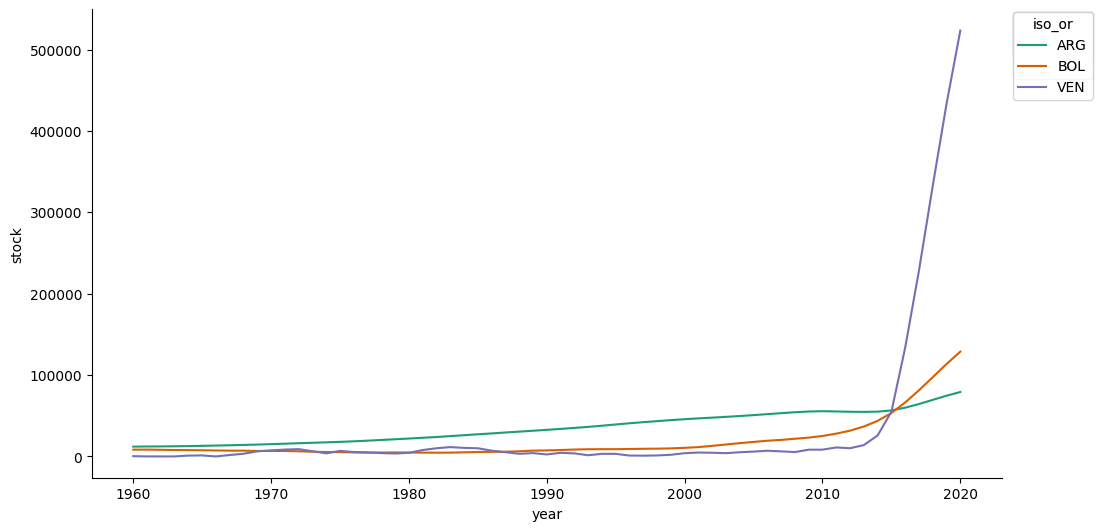

In [ ]:
# @title year vs stock (Migrants in Chile)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['stock']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = chl_mig_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('iso_or')):
  _plot_series(series, series_name, i)
  fig.legend(title='iso_or', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('stock')

In [ ]:
# Filter latam_mig_df for years 2011 to 2016
latam_mig_2016 = latam_mig_df[(latam_mig_df['year'] >= 2011) & (latam_mig_df['year'] <= 2016)]


,iso_or,origin,iso_des,destination,year,stock,flow,inflow,outflow
111843,ARG,Argentina,BOL,Bolivia,2011,37788,1377.0,NaN,NaN
111844,ARG,Argentina,BOL,Bolivia,2012,38995,1473.0,NaN,NaN
111845,ARG,Argentina,BOL,Bolivia,2013,40246,1523.0,NaN,NaN
111846,ARG,Argentina,BOL,Bolivia,2014,41495,1527.0,NaN,NaN
111847,ARG,Argentina,BOL,Bolivia,2015,42696,1485.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2788445,VEN,Venezuela,CHL,Chile,2012,10070,-906.0,NaN,NaN
2788446,VEN,Venezuela,CHL,Chile,2013,13951,3940.0,NaN,NaN
2788447,VEN,Venezuela,CHL,Chile,2014,25772,11904.0,NaN,NaN
2788448,VEN,Venezuela,CHL,Chile,2015,54887,29271.0,NaN,NaN


In [ ]:
mob_and_mig = pd.merge(latam_df, latam_mig_2016,  how='inner', left_on=['year', 'target_iso3', 'source_iso3'], right_on=['year', 'iso_des', 'iso_or'])

In [ ]:
# Filter data for source_iso3 'VEN' and target_iso2 'CHL' and 'ARG'
ven_df = mob_and_mig[(mob_and_mig['source_iso3'] == 'VEN') & (mob_and_mig['target_iso3'].isin(['CHL', 'ARG']))]


In [ ]:
ven_df = ven_df[['source_iso3', 'target_iso3', 'year', 'estimated_trips', 'stock', 'flow']]
ven_df

,source_iso3,target_iso3,year,estimated_trips,stock,flow
54,VEN,CHL,2013,56746.0,13951,3940.0
56,VEN,CHL,2012,63198.0,10070,-906.0
57,VEN,ARG,2016,83783.0,24999,23590.0
58,VEN,CHL,2016,83651.0,133624,79073.0
59,VEN,CHL,2011,83841.0,11040,2762.0
60,VEN,ARG,2011,132276.0,0,-1100.0
61,VEN,CHL,2015,60878.0,54887,29271.0
64,VEN,ARG,2014,138234.0,0,0.0
65,VEN,ARG,2012,128219.0,0,0.0
67,VEN,ARG,2015,125041.0,1420,1420.0


In [ ]:
#ven_df.to_csv('ven_data.csv', index=False)

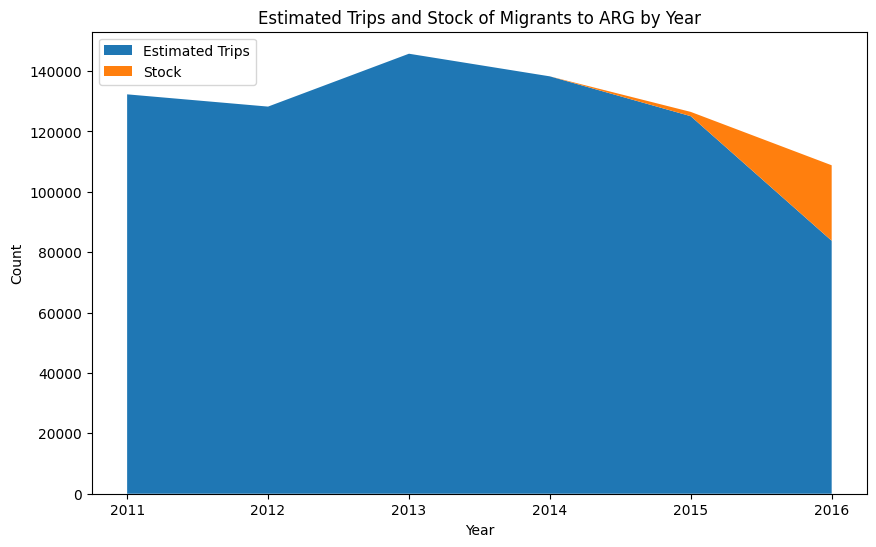

In [ ]:
# prompt: grafico de área para target_iso3 ARG mostrando estimated_trips y stock

# Filter data for target_iso3 'ARG'
arg_df = ven_df[ven_df['target_iso3'] == 'ARG']

# Group by year and get the sum of estimated_trips and stock
arg_grouped = arg_df.groupby('year').agg({'estimated_trips': 'sum', 'stock': 'sum'})

# Create the area chart
plt.figure(figsize=(10, 6))
plt.stackplot(arg_grouped.index, arg_grouped['estimated_trips'], arg_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=['#1f77b4', '#ff7f0e'])

plt.title('Estimated Trips and Stock of Migrants to ARG by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

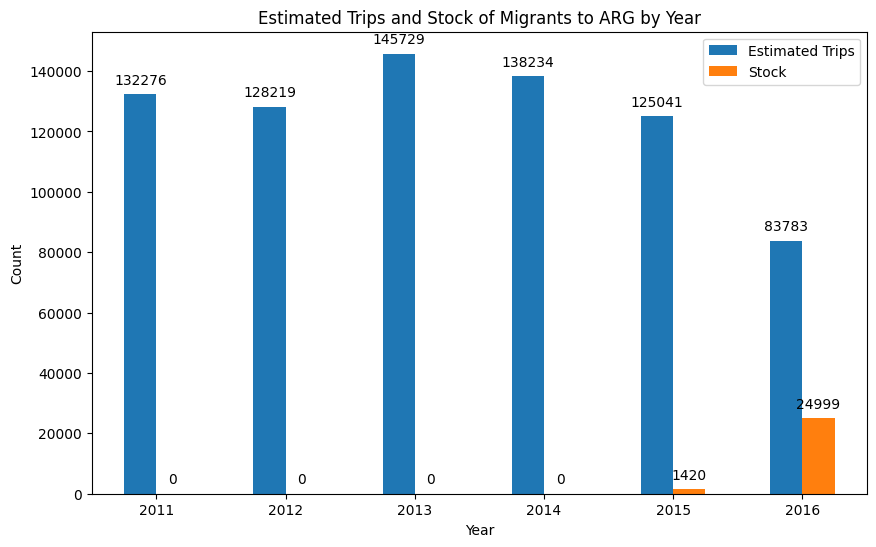

In [ ]:
# Create the bar chart
ax = arg_grouped.plot(kind='bar', figsize=(10, 6))

# Add labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Estimated Trips and Stock of Migrants to ARG by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Estimated Trips', 'Stock'])
plt.show()

In [ ]:
# prompt: crear una pivot table con ven_df que tenga el year en cada fila y las columnas sean ARG-stock ARG-estimated_trips CHL-Stock CHL-estimated_trips

# Create a pivot table with year in rows and ARG-stock, ARG-estimated_trips, CHL-Stock, CHL-estimated_trips as columns
pivot_ven_df = ven_df.pivot_table(index='year', columns='target_iso3', values=['stock', 'estimated_trips'], aggfunc='sum')

pivot_ven_df

estimated_trips           stock        
target_iso3             ARG      CHL    ARG     CHL
year                                               
2011               132276.0  83841.0      0   11040
2012               128219.0  63198.0      0   10070
2013               145729.0  56746.0      0   13951
2014               138234.0  50523.0      0   25772
2015               125041.0  60878.0   1420   54887
2016                83783.0  83651.0  24999  133624

In [ ]:
# Rename columns for clarity
pivot_ven_df = pivot_ven_df.rename(columns={
    ('stock', 'ARG'): 'ARG-stock',
    ('estimated_trips', 'ARG'): 'ARG-estimated_trips',
    ('stock', 'CHL'): 'CHL-stock',
    ('estimated_trips', 'CHL'): 'CHL-estimated_trips'
})

pivot_ven_df

estimated_trips           stock        
target_iso3             ARG      CHL    ARG     CHL
year                                               
2011               132276.0  83841.0      0   11040
2012               128219.0  63198.0      0   10070
2013               145729.0  56746.0      0   13951
2014               138234.0  50523.0      0   25772
2015               125041.0  60878.0   1420   54887
2016                83783.0  83651.0  24999  133624

<Figure size 1200x600 with 0 Axes>

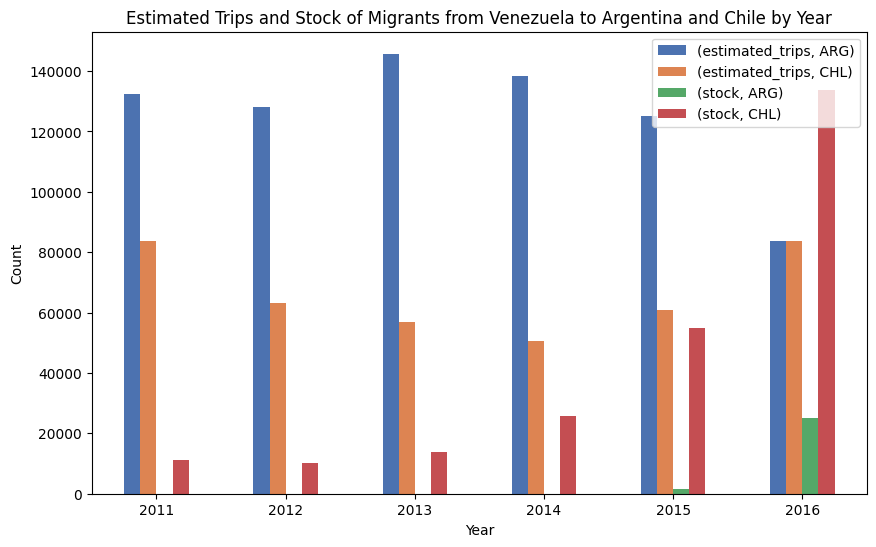

In [ ]:
# prompt: create a barplot with pivot_ven_df with seaborn and deep palette colors

plt.figure(figsize=(12, 6))
sns.set_palette("deep")  # Use the "deep" palette
pivot_ven_df.plot(kind='bar', figsize=(10, 6))
plt.title('Estimated Trips and Stock of Migrants from Venezuela to Argentina and Chile by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## Bolivian migration to Chile and Argentina


In [ ]:
# Filter data for source_iso3 'VEN' and target_iso2 'CHL' and 'ARG'
bol_df = mob_and_mig[(mob_and_mig['source_iso3'] == 'BOL') & (mob_and_mig['target_iso3'].isin(['CHL', 'ARG']))]
bol_df = bol_df[['source_iso3', 'target_iso3', 'year', 'estimated_trips', 'stock', 'flow']]

In [ ]:

# Filter data for target_iso3 'ARG'
arg_df = bol_df[bol_df['target_iso3'] == 'ARG']
chl_df = bol_df[bol_df['target_iso3'] == 'CHL']

# Group by year and get the sum of estimated_trips and stock
arg_grouped = arg_df.groupby('year').agg({'estimated_trips': 'sum', 'stock': 'sum'})
chl_grouped = chl_df.groupby('year').agg({'estimated_trips': 'sum', 'stock': 'sum'})



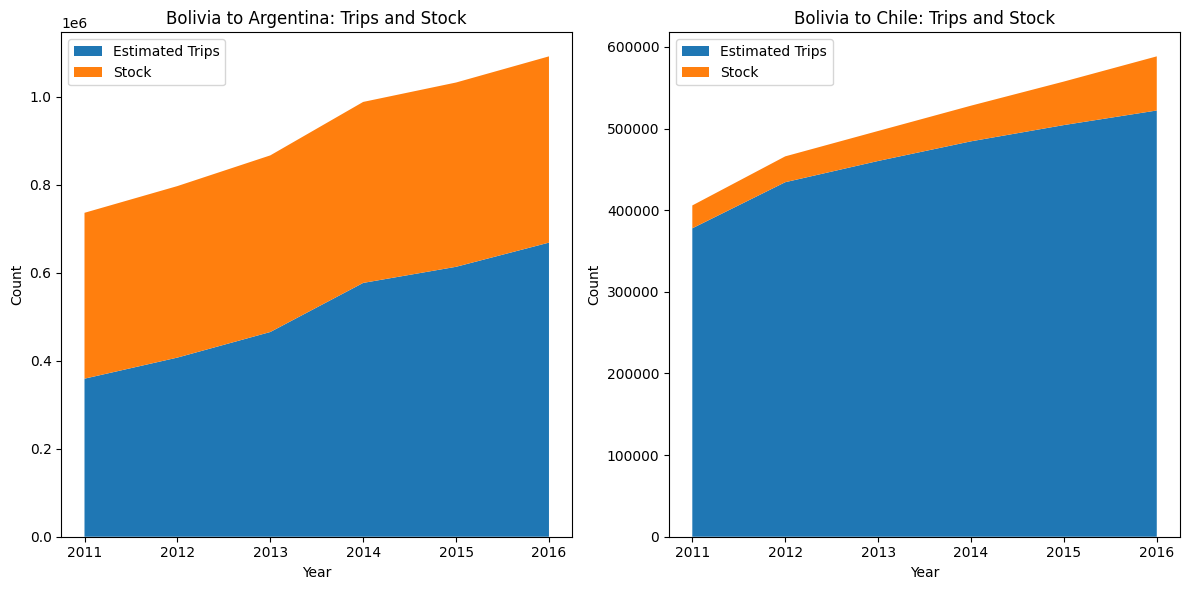

In [ ]:
# prompt: crear una grilla con dos stackplot uno usando arg_grouped y otro chl_grouped

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stackplot(arg_grouped.index, arg_grouped['estimated_trips'], arg_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=['#1f77b4', '#ff7f0e'])
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.stackplot(chl_grouped.index, chl_grouped['estimated_trips'], chl_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=['#1f77b4', '#ff7f0e'])
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

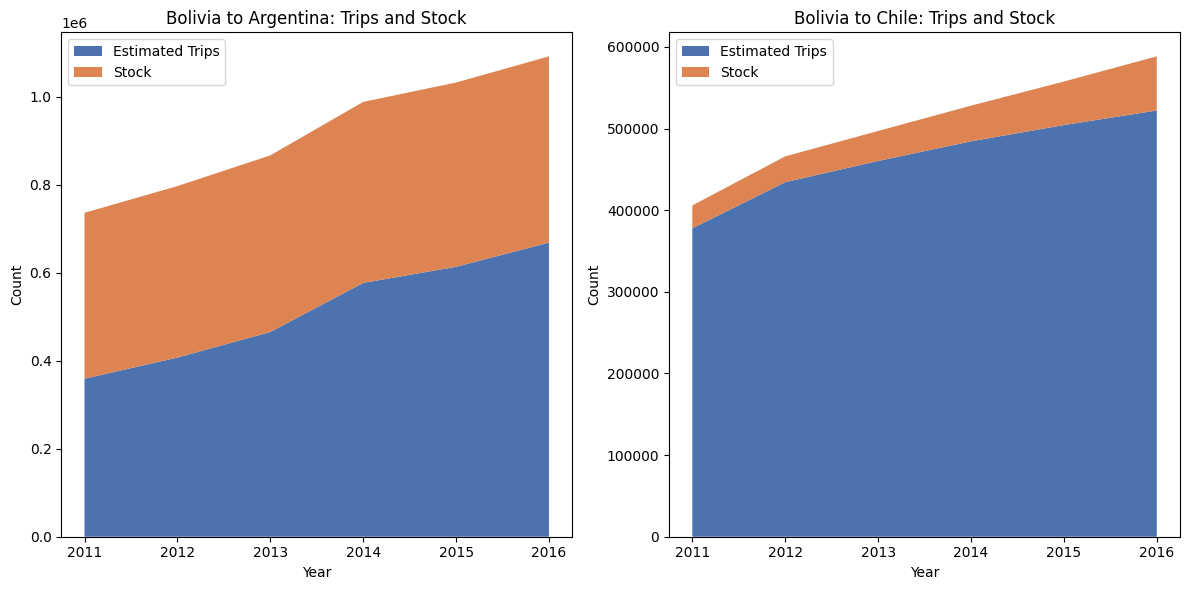

In [ ]:
# prompt: crear una grilla con dos stackplot uno usando arg_grouped y otro chl_grouped usando seaborn and deep palette colors

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.stackplot(arg_grouped.index, arg_grouped['estimated_trips'], arg_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=sns.color_palette("deep"))
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.stackplot(chl_grouped.index, chl_grouped['estimated_trips'], chl_grouped['stock'],
              labels=['Estimated Trips', 'Stock'], colors=sns.color_palette("deep"))
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

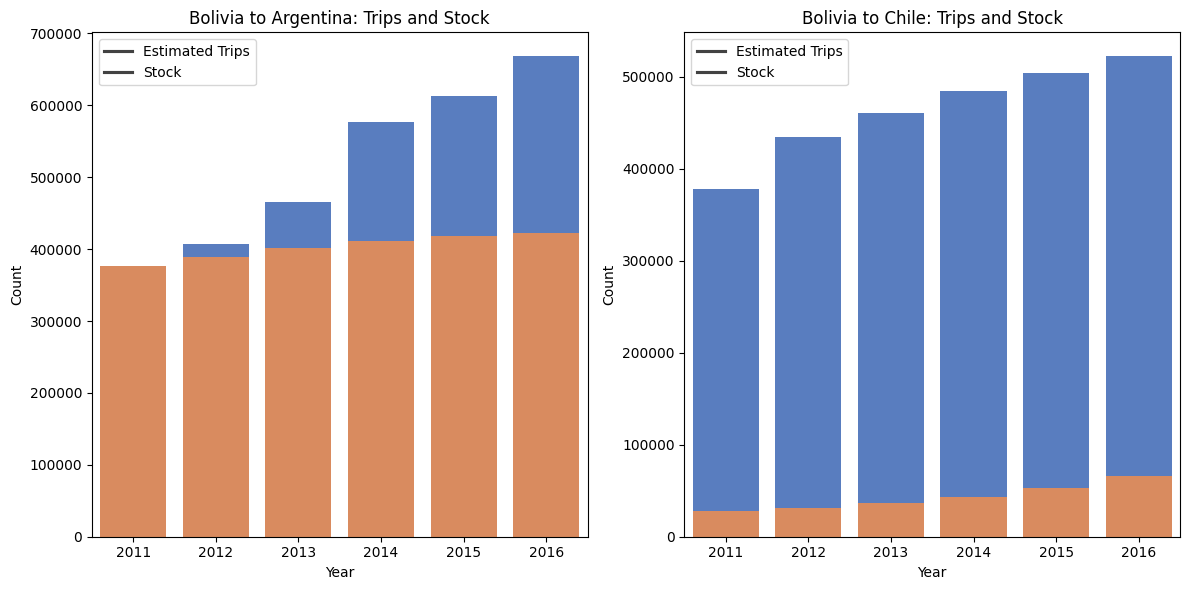

In [ ]:
# prompt: crear una grilla con dos barplots uno usando arg_grouped y otro chl_grouped usando seaborn and deep palette colors

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=arg_grouped.index, y=arg_grouped['estimated_trips'], color=sns.color_palette("muted")[0])
sns.barplot(x=arg_grouped.index, y=arg_grouped['stock'], color=sns.color_palette("muted")[1])
plt.title('Bolivia to Argentina: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Estimated Trips', 'Stock'])

plt.subplot(1, 2, 2)
sns.barplot(x=chl_grouped.index, y=chl_grouped['estimated_trips'], color=sns.color_palette("muted")[0])
sns.barplot(x=chl_grouped.index, y=chl_grouped['stock'], color=sns.color_palette("muted")[1])
plt.title('Bolivia to Chile: Trips and Stock')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(['Estimated Trips', 'Stock'])

plt.tight_layout()
plt.show()